In [1]:
import requests, bs4

url="https://www.worldometers.info/coronavirus/"
req = requests.get(url)

# create a bs4 object
# To avoid warnings, provide "html5lib" explicitly
soup = bs4.BeautifulSoup(req.text, "html5lib")


In [2]:
liveCount = str(soup.select(".maincounter-number"))
liveCount = liveCount.split('</div>')


In [3]:
#print(liveCount[0].index('aaa'))
totalCases = liveCount[0][59:liveCount[0].index('</span')]
totalCases  = int(totalCases.replace(',',''))
totalDeaths =str(liveCount[1].split('<span>')[1])[:liveCount[1].split('<span>')[1].index('</span>')]
totalDeaths  = int(totalDeaths.replace(',',''))

totalRecoveredCases = str(liveCount[2].split('<span>')[1])[:liveCount[1].split('<span>')[1].index('</span>')]
totalRecoveredCases  = int(totalRecoveredCases.replace(',',''))


activeCases = totalCases - totalRecoveredCases-totalDeaths


In [4]:
mildCaseWeb  = str(soup.select(".number-table"))
mildCaseWeb = mildCaseWeb.split('</span')
mildCase =mildCaseWeb[0].split(">")
mildCase = mildCase[1].replace(',','')
mildCase = int(mildCase)

In [5]:
seriousCase =mildCaseWeb[1].split(">")

seriousCase = seriousCase[2]
seriousCase = seriousCase.replace(',','')
seriousCase = int(seriousCase)

In [6]:
print(seriousCase)
print(mildCase)

51156
1305951


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if sys.path[0] == '':


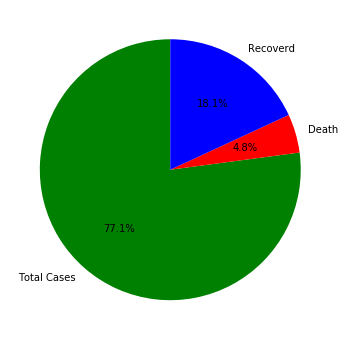

In [7]:
values ={totalCases:totalCases,totalDeaths:totalDeaths,totalRecoveredCases:totalRecoveredCases}
import pandas as pd

overAllData = pd.DataFrame([values])
overAllData.columns = ['Total_Cases','Total_Death','Recovered']
overAllData = overAllData.transpose()
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))

activities = ['Total Cases', 'Death','Recoverd']
colors = ['g', 'r','b']
plt.pie(overAllData, labels=activities, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

In [13]:
country  = str(soup.select("#main_table_countries_today"))

In [14]:
country =country.split('</tr')


In [15]:

dataList =[('countryName','totalCases','deaths','recoveredCases','seriousCases','totalTest','casespermillion','deathspermillion')]
for i in range(9,len(country)):
    countryData  = country[i].split('td style="font-weight: bold; text-align:right">')
    
     #country name
    if(('</a></td>') in countryData[0]  in  countryData[0]):
        countryName = countryData[0].split('</a></td>')
        countryName1 = countryName[0].split('/">')
        actualName  = countryName[0].split('/">')[1]
        

    elif(('font-style:italic; "') in countryData[0]  in  countryData[0]):
        
        countryName = countryData[0].split('font-style:italic; "')
        countryName1 = countryName[1].split("', '>")        
        actualName =countryName1[0][1:countryName1[0].index('</span')]
        #print(actualName)
    ####end of country name
  
    #total cases
    
    totalCases = countryData[1][:countryData[1].index('</td>')]
    # end of total cases
    #countryDeaths
    
        
        
    if('text-align:right;">' in  countryData[1]):
        countryDeaths = countryData[1].split('text-align:right;">')
      
    else:
        countryDeaths = countryData[1].split('text-align:right">')
        #print(countryDeaths)

        
    #print(countryDeaths)
    if(len(countryDeaths) ==  4):
        #print(len(countryDeaths))
        #print('4 ',countryDeaths[2].split('bold;')[0])
        deaths =countryDeaths[2].split('bold;')[0]
        deaths = deaths[:deaths.index('</td>')]
    elif(len(countryDeaths) ==  3):
        
        deaths =countryDeaths[1].split('bold;')[0]
        
        if(len(deaths) == 30 ):
            
            
            deaths = countryDeaths[2][:countryDeaths[2].index('</td>')]
            
            #print(countryDeaths[1].split('bold;'))
        else:  
            deaths = deaths[:deaths.index('</td>')]
        #print(actualName,' ',deaths)

    else:
        deaths =countryDeaths[1]
        deaths = deaths[:deaths.index('</td>\n')]
    # end of total death
    
    
    ### recovered deaths
    recoveredCases  = countryData[2][:countryData[2].index('</td')]
    if('Uru' in actualName ):
        print(recoveredCases)
    ##### active cases will be totalCase -recoveredCases-countryDeaths
    
    ####serious cases
    seriousCases  = countryData[3][:countryData[3].index('</td')]
    
    #####total test
    totalTest  = countryData[6][:countryData[6].index('</td')]
    #### cases per 1 million
    
    caseRate  = countryData[4][:countryData[4].index('</td')]
    ####deathRatePerPopulation
    deathRate  = countryData[5][:countryData[5].index('</td')]

    dataList.append((actualName,totalCases,deaths,recoveredCases,seriousCases,totalTest,caseRate,deathRate))
    
    #print(len(dataList))
    
    

248


IndexError: list index out of range

# dataList[0]

In [16]:
dataList[0]

('countryName',
 'totalCases',
 'deaths',
 'recoveredCases',
 'seriousCases',
 'totalTest',
 'casespermillion',
 'deathspermillion')

In [17]:
dataList[94]

('Channel Islands', '436', '9 ', '48', '', '3,320', '2,508', '52')

In [18]:
dataList[59]

('Hungary', '1,512', '122 ', '122', '58', '35,825', '157', '13')

In [19]:
countryName =[]
totalCases=[]
deaths=[]
recoveredCases = []
seriousCases = [] 
totalTest = [] 
casespermillion = []
deathspermillion = []
count = 0
for data in dataList:
    if(count == 0):
        count = 1
        continue
    countryName.append(data[0])
    try:
        m = float(data[1].replace(',',''))
        totalCases.append(m)
    except:
        totalCases.append(0)
    try:
        m = float(data[2].replace(',',''))
        deaths.append(m)
    except:
        deaths.append(0)
    
    try:
        m = float(data[3].replace(',',''))
        recoveredCases.append(m)
    except:
        recoveredCases.append(0)
        
    
    try:
        m= float(data[4].replace(',',''))
        seriousCases.append(m)
    except:
        seriousCases.append(0)
    try:
        m= float(data[5].replace(',',''))
        totalTest.append(m)
    except:
        totalTest.append(0)
    
    try:
        m = float(data[6].replace(',',''))
        casespermillion.append(m)
    except:
        casespermillion.append(0)
    try:
        m= float(data[7].replace(',',''))
        deathspermillion.append(m)
    except:
        deathspermillion.append(0)
    
    
    


In [20]:
covid19Data = pd.DataFrame(countryName,columns=['Country/Region'])
covid19Data['Total_Cases']  = pd.Series(totalCases)
covid19Data['Deaths']  = pd.Series(deaths)
covid19Data['Recovered_Cases']  = pd.Series(recoveredCases)
covid19Data['Active_Cases']  = covid19Data['Total_Cases'] -covid19Data['Deaths'] -covid19Data['Recovered_Cases'] 
covid19Data['Serious_Cases']  = pd.Series(seriousCases)
covid19Data['Total_Test']  = pd.Series(totalTest)
covid19Data['Cases_per_million']  = pd.Series(casespermillion)
covid19Data['Deaths_per_million']  = pd.Series(deathspermillion)

In [23]:
covid19Data.head(100)


,Country/Region,Total_Cases,Deaths,Recovered_Cases,Active_Cases,Serious_Cases,Total_Test,Cases_per_million,Deaths_per_million
0,USA,587173.0,23644.0,36948.0,526581.0,12772.0,2943955.0,1774.0,71.0
1,Spain,170099.0,17756.0,64727.0,87616.0,7371.0,600000.0,3638.0,380.0
2,Italy,159516.0,20465.0,35435.0,103616.0,3260.0,1046910.0,2638.0,338.0
3,France,136779.0,14967.0,27718.0,94094.0,6821.0,333807.0,2095.0,229.0
4,Germany,130072.0,3194.0,68200.0,58678.0,4288.0,1317887.0,1552.0,38.0
...,...,...,...,...,...,...,...,...,...
95,Honduras,407.0,26.0,7.0,374.0,10.0,1600.0,41.0,3.0
96,Taiwan,393.0,6.0,124.0,263.0,0.0,48549.0,17.0,0.3
97,Jordan,391.0,7.0,215.0,169.0,5.0,20500.0,38.0,0.7
98,Réunion,391.0,0.0,40.0,351.0,3.0,0.0,437.0,0.0
